# Role R Likelihood-free Simulation Based Inference
## Basic Overview
- We have a simulator that takes in some input parameters and returns some simulated output parameters
- Goal is to create a machine learning model that takes in simulator outputs and predict what the input parameters could be.
- In theory we could take real life observed data and predict the parameters that life follows.

In [2]:
from roler.model import ModelPrior
from roler.distributions import *

/Users/micahtilton/Documents/GitHub/likelihood-free-inference/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Defining the Model Prior

This cell defines the prior distributions and fixed values for the simulation model using the `ModelPrior` class. This object will be used to sample parameter values for each simulation run.

In [ ]:
prior = ModelPrior(
    individuals_local=IntDistribution(50, 300),
    individuals_meta=IntDistribution(400, 1000),
    species_meta=IntDistribution(400, 1000),
    speciation_local=FloatDistribution(0.0, 1.0),
    speciation_meta=0.05,
    extinction_meta=0.05,
    env_sigma=0.5,
    trait_sigma=1,
    comp_sigma=0.5,
    dispersal_prob=0.1,
    mutation_rate=0.01,
    equilib_escape=1,
    num_basepairs=250,
    init_type='oceanic_island',
    niter=20000,
    niterTimestep=10
)

In [ ]:
prior = ModelPrior(
    individuals_local=IntDistribution(50, 300),
    individuals_meta=IntDistribution("individuals_meta", 1000),
    speciation_meta=0.05,
    extinction_meta=0.05,
    niter=20000,
    niterTimestep=10
)

In [33]:
uniform = prior.get_joint_uniform()
sample = uniform.sample()
print(sample)

tensor([ 82.3919, 917.3896, 992.6756,   0.9942])


In [34]:
prior.get_params_from_tensor(sample)

ModelParams(individuals_local=82, individuals_meta=917, species_meta=993, speciation_local=0.9942167401313782, speciation_meta=0.05, extinction_meta=0.05, env_sigma=0.5, trait_sigma=1, comp_sigma=0.5, dispersal_prob=0.1, mutation_rate=0.01, equilib_escape=1, num_basepairs=250, init_type='oceanic_island', niter=20000, niterTimestep=10)

## Running a Single Simulation and Extracting Summary Statistics

This cell executes a single simulation run. First, it initializes a `Simulator` object. Then, it samples a set of parameter values (`theta`) from the `prior` distribution defined in the previous cell. Finally, it runs the simulation using these sampled parameters and stores the resulting summary statistics in the `stats` variable. The `stats` variable is then printed to display the simulation output.

In [16]:
from roler.simulation import Simulator

simulator = Simulator()
theta = prior.sample()
stats = simulator.simulate(theta)
stats

,hill_abund_1,hill_abund_2,hill_abund_3,hill_abund_4,hill_gen_1,hill_gen_2,hill_gen_3,hill_gen_4,hill_trait_1,hill_trait_2,hill_trait_3,hill_trait_4,hill_phy_1,hill_phy_2,hill_phy_3,hill_phy_4,richness,iteration
1,1.000000,1.000000,1.000000,1.000000,1.0,inf,inf,inf,NaN,NaN,NaN,NaN,1,2,3,4,1,0.0
2,1.137253,1.044766,1.033517,1.029739,1.0,inf,inf,inf,12.284392,11.959013,11.918316,11.904579,1,2,3,4,4,10.0
3,1.226354,1.076175,1.056915,1.050437,1.0,inf,inf,inf,10.710672,9.965664,9.644509,9.410867,1,2,3,4,5,20.0
4,1.279798,1.092474,1.068948,1.061061,1.0,inf,inf,inf,11.038452,10.222132,9.872503,9.610042,1,2,3,4,6,30.0
5,1.335497,1.109144,1.081211,1.071874,1.0,inf,inf,inf,12.084959,11.103636,10.717149,10.385564,1,2,3,4,7,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,19.293907,12.099111,8.950936,7.476699,1.0,inf,inf,inf,20.433423,14.446339,11.854735,10.580094,1,2,3,4,33,19960.0
1998,20.443841,13.449153,10.134060,8.497171,1.0,inf,inf,inf,21.396818,15.378967,12.599588,11.191110,1,2,3,4,33,19970.0
1999,20.473452,13.641834,10.422760,8.813002,1.0,inf,inf,inf,20.869321,15.151701,12.450782,11.043043,1,2,3,4,33,19980.0
2000,19.911564,13.544808,10.415014,8.818676,1.0,inf,inf,inf,20.388450,14.943198,12.324125,10.962732,1,2,3,4,31,19990.0


## Graphing Richness over Iteration

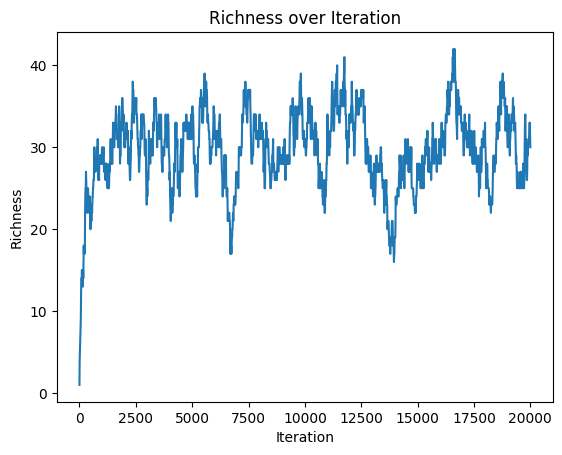

In [17]:
import matplotlib.pyplot as plt

plt.plot(stats['iteration'], stats['richness'])
plt.xlabel('Iteration')
plt.ylabel('Richness')
plt.title('Richness over Iteration')
plt.show()